In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading dataset file
dataset = pd.read_csv('D://Data Science//Intellipaat//Project//combined_data_1//combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [5]:
#To inspect the shape of the datset
dataset.shape

(24058263, 2)

In [6]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].count()
p

Rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: Rating, dtype: int64

In [7]:
p=pd.DataFrame(p)
p

,Rating
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [8]:
#p=p.rename(columns = {'Rating':'Count'})

In [9]:
p.rename(columns = {'Rating':'Count'}, inplace = True)

In [10]:
#p.reset_index(inplace=True)

In [11]:
p.sort_values(by='Count', ascending=False)

,Count
Rating,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


In [12]:
dataset.shape

(24058263, 2)

In [13]:
dataset.isna()

,Cust_Id,Rating
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24058258,False,False
24058259,False,False
24058260,False,False
24058261,False,False


In [14]:
dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [15]:
# get movie count by counting nan values
movie_count = dataset.isnull().sum()[1]
movie_count

4499

In [16]:
dataset['Cust_Id'].nunique()#will display number of unique values in the column

475257

In [17]:
dataset['Cust_Id'].unique()# will display unique values of the column

array(['1:', '1488844', '822109', ..., '72311', '4499:', '594210'],
      dtype=object)

In [18]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count
cust_count

470758

In [19]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

In [20]:
p

,Count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [21]:
p.reset_index(inplace=True)
p

,Rating,Count
0,1.0,1118186
1,2.0,2439073
2,3.0,6904181
3,4.0,8085741
4,5.0,5506583


## To plot the distribution of the ratings in as a bar plot

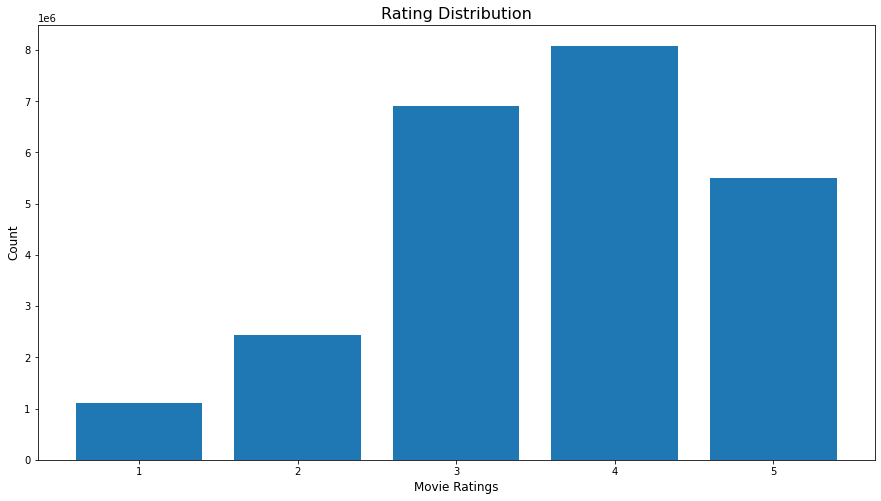

In [22]:
plt.figure(figsize=(15,8))
plt.bar(p['Rating'], p['Count'], data=p)
plt.xlabel('Movie Ratings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Rating Distribution', fontsize=16)
plt.show()

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [23]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating) )
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [24]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]
df_nan.shape

(4499, 1)

In [25]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [26]:
# To reset the index of the dataframe
df_nan=df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [27]:
df_nan.shape

(4499, 2)

In [28]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [29]:
dataset.shape

(24058263, 2)

In [30]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [31]:
print('movie numpy:', movie_np)

movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]


In [32]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [33]:
dataset[pd.notnull(dataset['Rating'])]

,Cust_Id,Rating
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
5,823519,3.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [34]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]

dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [35]:
dataset.head(20)

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1
7,124105,4.0,1
8,1248029,3.0,1
9,1842128,4.0,1
10,2238063,3.0,1


In [36]:
dataset.shape

(24053764, 3)

# Data Cleaning

In [37]:
f = ['count','mean']

In [38]:
dataset.groupby('Movie_Id').agg(f)

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [39]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.75),2)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] <= movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 2538.0


In [40]:
#calculate the thershold value of each customer,
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)#f= count(), mean()
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.75),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 64.0


In [41]:
drop_movie_list

Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3374)

In [42]:
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
            2649409, 2649421, 2649429],
           dtype='int64', name='Cust_Id', length=351840)

In [43]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (15622656, 3)


In [44]:
print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
5106,824097,2.0,8
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [45]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')
print(df_p.shape)

(118918, 1125)


In [46]:
df_p.head()

Movie_Id,8,16,17,18,26,28,30,33,44,45,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### To load the movie_titles dataset

In [47]:
df_title = pd.read_csv(r"D:\Data Science\Intellipaat\Project\movie_titles.csv",encoding="ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [48]:
#conda install -c conda-forge scikit-surprise-- anaconda prompt
#conda update -n base -c defaults conda-- update your conda in anaconda prompt
#!pip install scikit-surprise config --global http.sslVerify false -- for jupyter users--  


In [49]:
# Import required libraries
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate#k-fold 

In [50]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9956  0.9890  0.9882  0.9909  0.0033  
MAE (testset)     0.7994  0.7947  0.7917  0.7952  0.0032  
Fit time          4.00    4.33    4.19    4.17    0.14    
Test time         0.20    0.27    0.17    0.21    0.04    


{'test_rmse': array([0.99556778, 0.98901358, 0.98819023]),
 'test_mae': array([0.79937867, 0.79465025, 0.79165982]),
 'fit_time': (3.996342658996582, 4.329433917999268, 4.188857316970825),
 'test_time': (0.20307636260986328, 0.2655644416809082, 0.17183423042297363)}

In [51]:
data

In [52]:
dataset.head()

,Cust_Id,Rating,Movie_Id
5106,824097,2.0,8
5109,785314,1.0,8
5110,243963,3.0,8
5112,1447783,4.0,8
5116,1912665,1.0,8


In [53]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


## To find all the movies rated as 5 stars by user with userId = 712664

In [54]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
457                    Kill Bill: Vol. 2
Name: Name, dtype: object

In [55]:
user_712664=df_title

In [56]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [57]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
#user_712664-- is only containg the names of the movies

# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                      Name  Estimate_Score
560   1963.0                              High and Low        5.000000
3289  1974.0                             The Godfather        5.000000
721   2003.0                        The Wire: Season 1        5.000000
871   1954.0                             Seven Samurai        5.000000
995   1961.0                                   Yojimbo        5.000000
174   1992.0                            Reservoir Dogs        5.000000
4352  2002.0            Curb Your Enthusiasm: Season 3        5.000000
3167  1987.0                 Evil Dead 2: Dead by Dawn        5.000000
1847  1956.0  Samurai Trilogy 3: Duel at Ganryu Island        4.933384
1031  1992.0                               Hard Boiled        4.929858
